In [3]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os

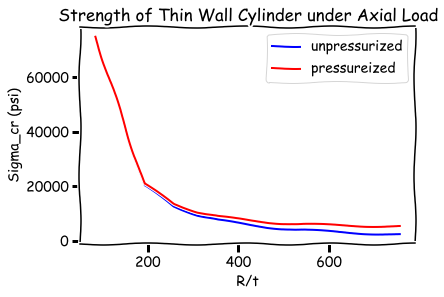

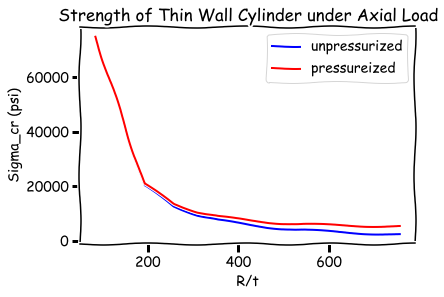

pbar [ 0.01        0.05157895  0.09315789  0.13473684  0.17631579  0.21789474
  0.25947368  0.30105263  0.34263158  0.38421053  0.42578947  0.46736842
  0.50894737  0.55052632  0.59210526  0.63368421  0.67526316  0.71684211
  0.75842105  0.8       ]
sigma_np [ 74813.68976057  20173.95677479  12581.36797022   9369.98142999
   7559.03221958   6383.24561725   5552.42811675   4931.13720158
   4447.24464777   4058.63851712   3738.99924896   3470.9896278
   3242.70112447   3045.66989341   2873.70701724   2722.17706847
   2587.53601391   2467.02553048   2358.4650804    2260.10700446]
sigma_p [ 74813.68976057  20801.88450398  13515.83947368  10535.51281292
   8917.53423642   7910.78541334   7232.20070731   6750.51430684
   6396.29111119   6129.27460634   5924.48731273   5765.59973371
   5641.48272343   5544.28988084   5468.33127538   5409.3815511
   5364.23853232   5330.43243141   5306.02888195   5289.49225563]


In [11]:
# cylinder obj
class airframe(object):
    """airframe creates an instance of an object that defines the properties of
    an axially loaded cylinder under various loading conditions and internal
    pressures"""
    def __init__(self):
        super(airframe, self).__init__()
        self.L = 36.0  # setting length of cylinder as a contant for now (inches)
        self.E = 10.0**7  # modulus of elasticity for AL 6061-T4 (psi)
        self.num_steps = 20

        self.get_pbar()
        self.get_p()
        self.get_delta_sigmacrbar()
        self.get_Rtratio()
        self.get_R()
        self.get_t()
        self.get_K0()
        self.get_sigmacrbar0()
        self.get_sigmacr_np()
        self.get_sigmacrbar_p()
        self.get_sigmacr_p()
        self.plot_sigmacr_np_v_tR()

    def get_pbar(self):
        """generate array of pbar values
        in the linear region as defined by
        Fung and Sechler"""
        self.pbar = np.linspace(0.01, 0.8, self.num_steps)

    def get_p(self):
        # self.p = np.linspace(0.0, 14.0, self.num_steps)
        self.p = 14.0  # setting as a constant for now; this should be changed later

    def get_delta_sigmacrbar(self):
        """constand defined by Fung and Sechler"""
        self.delta_sigmacrbar = np.linspace(0, 0.229, self.num_steps)

    def get_Rtratio(self):
        """get ratios of R/t based on each pbar value and p values"""
        self.Rtratio = np.sqrt(self.pbar/self.p*self.E)

    def get_R(self):
        """constant value defined by vehicle size"""
        self.R = 6.0  # inches

    def get_t(self):
        self.t = self.R/self.Rtratio

    def get_K0(self):
        """K0 is calculated from a formula derived from empirical measurements
        made by Fung et. Sechler"""
        self.K0 = self.Rtratio*(9*(1.0/self.Rtratio)**1.6 +
                                0.16*(self.t/self.L)**1.3)

    def get_sigmacrbar0(self):
        self.sigmacrbar0 = self.K0

    def get_sigmacr_np(self):
        """calculate sigmacr without internal pressure"""
        self.sigmacr_np = self.K0 * self.E / self.Rtratio

    def get_sigmacrbar_p(self):
        self.sigmacrbar_p = self.sigmacrbar0 + self.delta_sigmacrbar

    def get_sigmacr_p(self):
        self.sigmacr_p = self.sigmacrbar_p * self.E / self.Rtratio

    def plot_sigmacr_np_v_tR(self):
        with plt.xkcd():
            plt.plot(self.Rtratio, self.sigmacr_np, 'b', label='unpressurized')
            plt.plot(self.Rtratio, self.sigmacr_p, 'r', label='pressureized')
            plt.xlabel('R/t')
            plt.ylabel('Sigma_cr (psi)')
            plt.title('Strength of Thin Wall Cylinder under Axial Load')
            plt.legend(loc='upper right')
            plt.savefig(os.path.join(os.getcwd(), 'AxialStrengthRt.png'))
            plt.show()

LaunchySLV = airframe()
LaunchySLV.plot_sigmacr_np_v_tR()

print('pbar', LaunchySLV.pbar)
print('sigma_np', LaunchySLV.sigmacr_np)
print('sigma_p', LaunchySLV.sigmacr_p)